In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sb 

#Importing, merging and cleaning datasets

RAbaseline_with_insertions =  pd.read_csv("/localdisk/home/s1533486/VDJtools/VDJtools_patient_files/insertions.RAbaseline_data_with_muts_vdjtools.txt", sep='\t')
all_data_insertions= pd.read_csv("/localdisk/home/s1533486/VDJtools/VDJtools_patient_files/insertions_all_data.txt", sep='\t') 
frames = [RAbaseline_with_insertions,all_data_insertions]
full_dataset_n_insertions = pd.concat(frames)
full_dataset_n_insertions = full_dataset_n_insertions[full_dataset_n_insertions['Mutations'] != 'Mutations']
full_dataset_n_insertions['base.insertsize'] = full_dataset_n_insertions['base.insertsize'].astype(int)
full_dataset_n_insertions['base.vdins'] = full_dataset_n_insertions['base.vdins'].astype(int)
full_dataset_n_insertions['base.djins'] = full_dataset_n_insertions['base.djins'].astype(int)
full_dataset_n_insertions['Mutations'] = full_dataset_n_insertions['Mutations'].astype(int)
full_dataset_n_insertions['base.cdr3length'] = full_dataset_n_insertions['base.cdr3length'].astype(int)
full_dataset_n_insertions.loc[full_dataset_n_insertions['Mutations']  < 5, 'MUT_STATUS'] = 'Hypomutated'
full_dataset_n_insertions.loc[full_dataset_n_insertions['Mutations']  >= 5, 'MUT_STATUS'] = 'Hypermutated'

In [9]:
full_dataset_n_insertions['base.cdr3length'] = full_dataset_n_insertions['base.cdr3length']/3

In [10]:
grouped_CDR3s = full_dataset_n_insertions.groupby(['Patient','Location','MUT_STATUS'])['base.cdr3length'].mean().reset_index(name='CDR3s')
grouped_CDR3s = grouped_CDR3s.loc[grouped_CDR3s['Patient'] != 'FALSE']
grouped_CDR3s = grouped_CDR3s.loc[grouped_CDR3s['Location'] != 'Synovium']

In [11]:
grouped_CDR3s

,Patient,Location,MUT_STATUS,CDR3s
0,A,Periphery,Hypermutated,16.925995
1,A,Periphery,Hypomutated,18.568564
4,A0001,Periphery,Hypermutated,17.303883
5,A0001,Periphery,Hypomutated,17.623165
6,A0002,Periphery,Hypermutated,16.162001
7,A0002,Periphery,Hypomutated,18.153153
8,A0003,Periphery,Hypermutated,17.338825
9,A0003,Periphery,Hypomutated,18.595393
10,A0004,Periphery,Hypermutated,17.121145
11,A0004,Periphery,Hypomutated,17.459854


/opt/anaconda/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


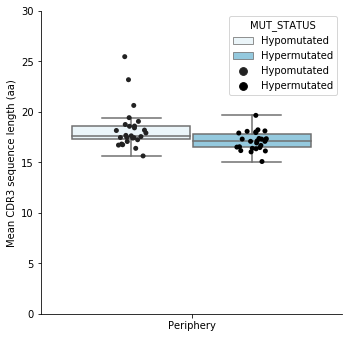

In [12]:
box = sb.catplot('Location','CDR3s',hue='MUT_STATUS',
                  data=grouped_CDR3s.loc[grouped_CDR3s['Location'] == 'Periphery'],
                  color = 'skyblue', kind = 'box', fliersize = 0, legend = False, hue_order=['Hypomutated','Hypermutated'])
dots = sb.stripplot('Location','CDR3s',hue='MUT_STATUS',
                  data=grouped_CDR3s.loc[grouped_CDR3s['Location'] == 'Periphery'],
                   color = 'black',
                    split = True, jitter = True,hue_order=['Hypomutated','Hypermutated'])
box.set(xlabel='', ylabel='Mean CDR3 sequence length (aa)', ylim = (0,30))
#plt.savefig('/localdisk/home/s1533486/Synovium_PBMCs/Figures/Fig5b_RA.pdf',dpi = 300)

/opt/anaconda/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


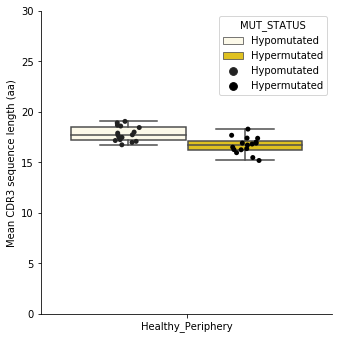

In [13]:
box = sb.catplot('Location','CDR3s',hue='MUT_STATUS',
                  data=grouped_CDR3s.loc[grouped_CDR3s['Location'] == 'Healthy_Periphery'],
                  color = 'gold', kind = 'box', fliersize = 0, legend = False, hue_order=['Hypomutated','Hypermutated'])
dots = sb.stripplot('Location','CDR3s',hue='MUT_STATUS',
                  data=grouped_CDR3s.loc[grouped_CDR3s['Location'] == 'Healthy_Periphery'],
                   color = 'black',
                    split = True, jitter = True,hue_order=['Hypomutated','Hypermutated'])
box.set(xlabel='', ylabel='Mean CDR3 sequence length (aa)', ylim = (0,30))
#plt.savefig('/localdisk/home/s1533486/Synovium_PBMCs/Figures/Fig5b_HD.pdf',dpi = 300)